<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_%EB%B6%84%EB%A5%98_YB_1%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YB 1조 미니프로젝트2

# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/wine_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/wine_data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/wine_data/sample_submission.csv')

# 데이터 전처리

In [ ]:
# index 칼럼 삭제
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [ ]:
# type 변수 : type white와 red 두 종류 원-핫 인코딩 진행
train = pd.get_dummies(data = train, columns = ['type'], prefix=['type'], dtype=int)
test = pd.get_dummies(data = test, columns = ['type'], prefix=['type'], dtype=int)

In [ ]:
train.head() # type_red 와 type_white 변수 생성

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


In [ ]:
# X, Y split
train_Y = train['quality']
train_X = train.drop('quality', axis=1)

# 데이터 탐색 (EDA)

In [ ]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


In [ ]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type_red              5497 non-null   int64  
 13  type_white            5497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 601.4 KB


- 변수 14개
- 결측치 없음

In [ ]:
# 요약 통계량 확인
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405,0.756595
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177,0.429177
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,1.000000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000,1.000000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


<Axes: >

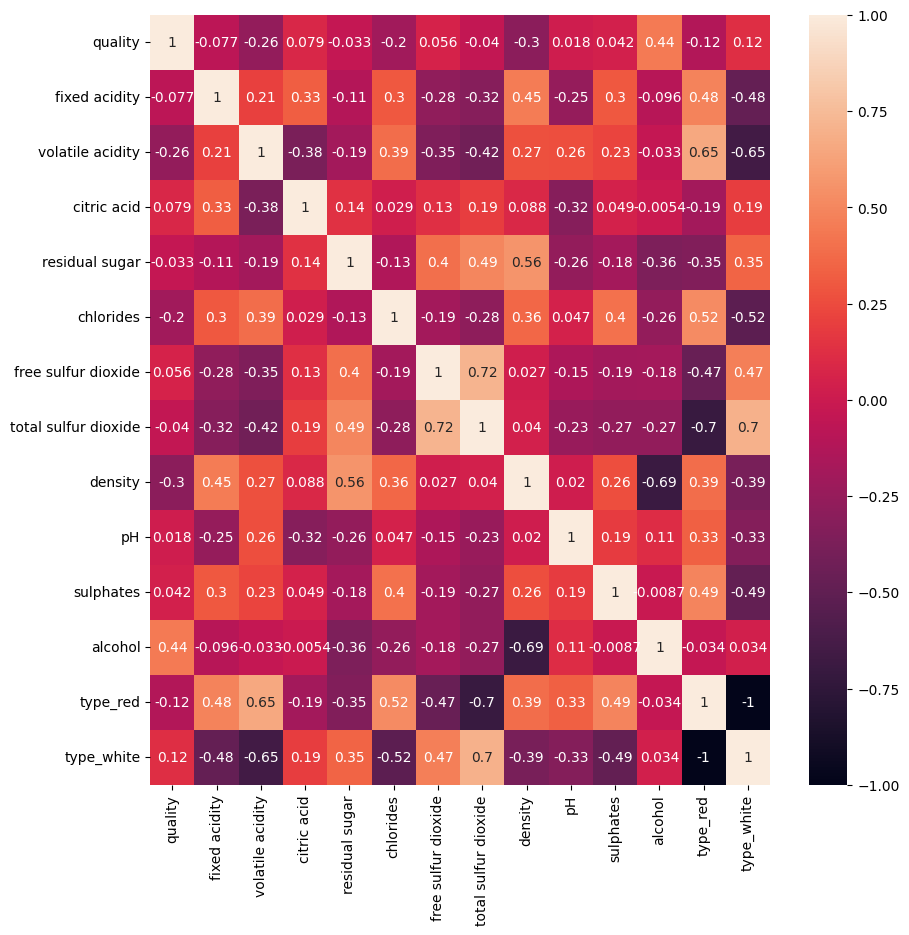

In [ ]:
# 변수간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(), annot = True)

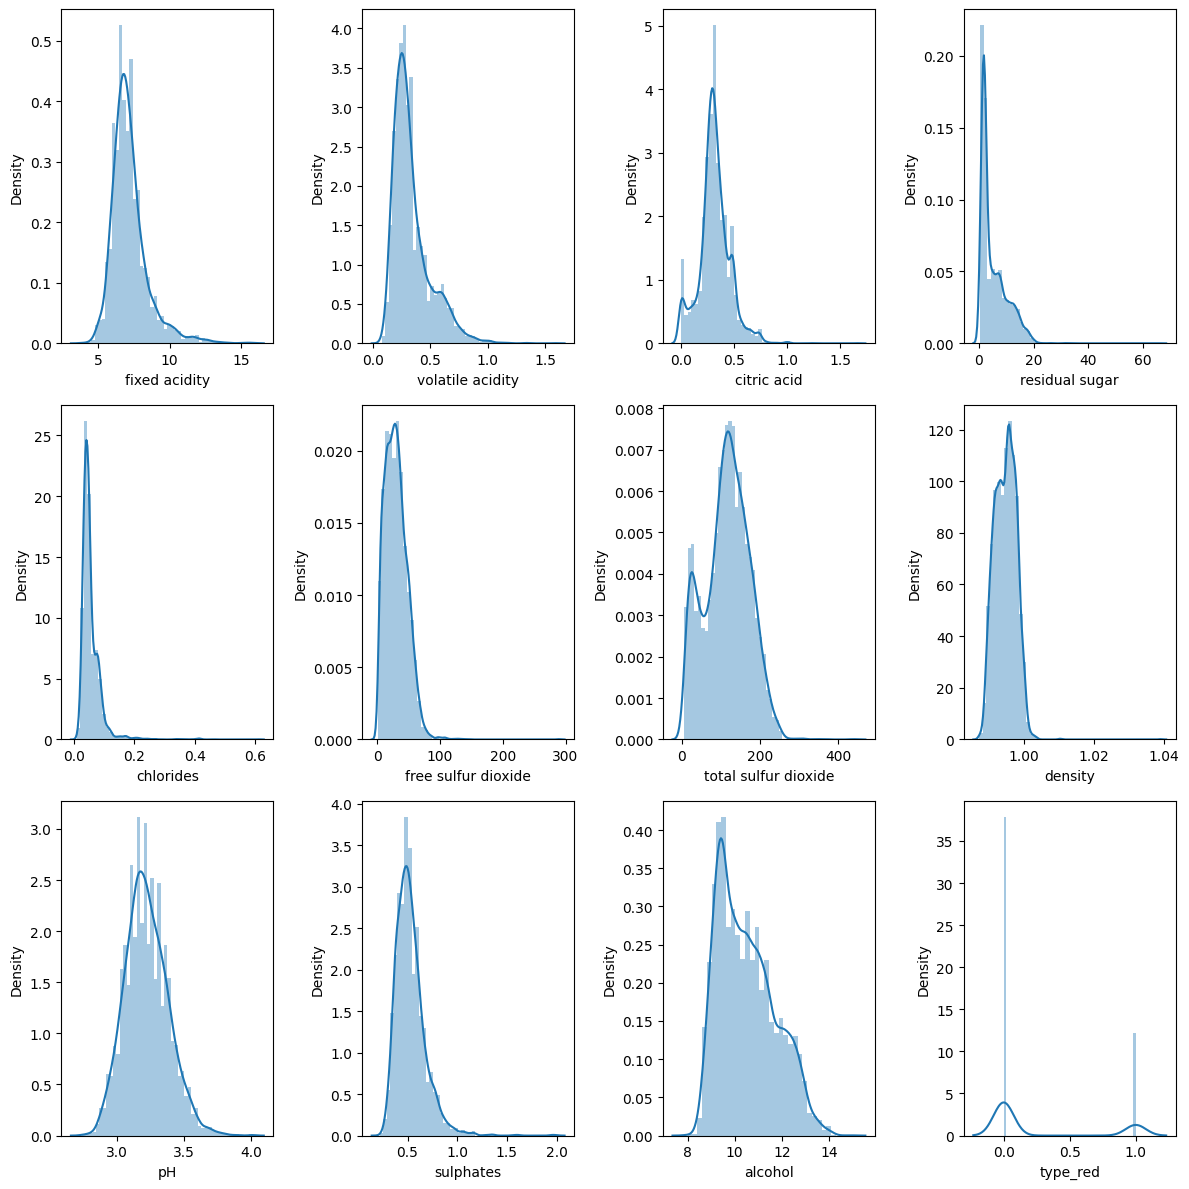

In [ ]:
# 데이터 시각화
plt.figure(figsize = (12,12))
for i in range(1,13) :
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

# 모델 생성 및 피처 중요도 확인

In [ ]:
# 모듈 임포트

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import plot_importance

## XGBoost

In [ ]:
# 레이블 인코딩
label_encoder = LabelEncoder()
train_Y = label_encoder.fit_transform(train_Y)  # Y를 0부터 시작하는 값으로 변환

In [ ]:
params = {'max_depth': [13, 14, 15] , 'min_child_weight': [1, 2, 3] ,'colsample_bytree': [0.5, 0.75],
          'learning_rate':[0.01,0.04,0.06],'reg_alpha':[0.01,0.03,0.05]}

xgb = XGBClassifier(n_estimators = 100)

gridcv = GridSearchCV(estimator=xgb, param_grid=params, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)
gridcv.fit(train_X, train_Y)

print("Best parameters:", gridcv.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 14, 'min_child_weight': 2, 'reg_alpha': 0.05}


In [ ]:
gridcv.best_score_

0.6494444007683811

In [ ]:
xgb = XGBClassifier(n_estimators=100, colsample_bytree=0.5, learning_rate=0.04, max_depth=14, min_child_weight=2, reg_alpha=0.05)

xgb.fit(train_X, train_Y)
Y_pred = xgb.predict(test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

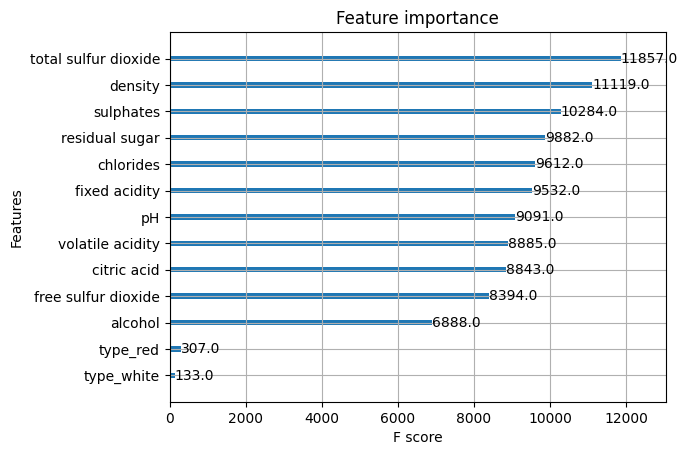

In [ ]:
xgb.fit(train_X, train_Y)
plot_importance(xgb)

## LightGBM

In [ ]:
# 모델링

# n_estimator=200 설정
lgbm = LGBMClassifier(n_estimators=200, verbose=-1)
lgbm.fit(train_X, train_Y, eval_metric="logloss")
pred2 = lgbm.predict(test)

In [ ]:
# 하이퍼 파라미터 튜닝
params = {'max_depth':[50,100,150,200],
          'num_leaves':[32, 64, 128],
          'min_child_samples':[20,30,50,100],
          'subsample':[0.6,0.7,0.8,0.9,1.0],
          'n_estimator':[100,200,300]}

lgb = LGBMClassifier(boost_from_average=False, verbose=-1)
gridcv = GridSearchCV(lgb, param_grid=params, cv=3)
gridcv.fit(train_X, train_Y)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 50, 'min_child_samples': 20, 'n_estimator': 100, 'num_leaves': 128, 'subsample': 0.6}
최고 예측 정확도: 0.6380


In [ ]:
# 최적 하이퍼 파라미터로 학습/예측
lgbm = LGBMClassifier(max_depth=50, min_child_samples=20, n_estimators=100, num_leaves=128, subsample=0.6)
lgbm.fit(train_X, train_Y, eval_metric="logloss")
pred = lgbm.predict(test)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

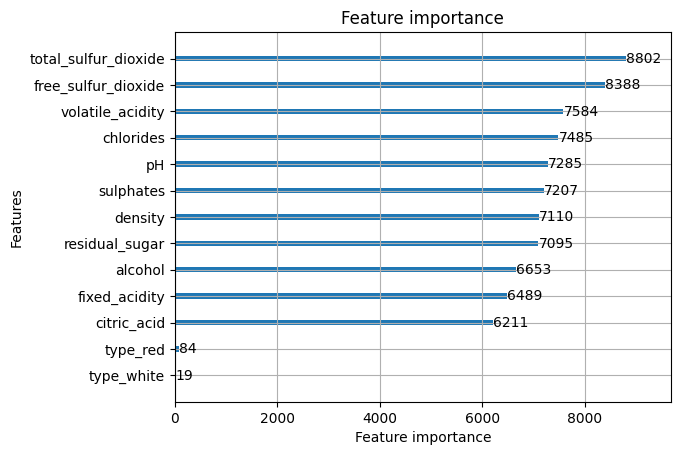

In [ ]:
# 피처 중요도 시각화
from lightgbm import plot_importance
plot_importance(lgbm)

## Random Forest

In [ ]:
# Random Forest Classifier model의 정확도를 측정하기 위해 train dataset을 적당히 나눈다
tr_x, ts_x, tr_y, ts_y = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

# 모델 생성
rf_clf_1 = RandomForestClassifier(n_estimators=150, random_state=156)
rf_clf_1.fit(tr_x,tr_y)
rf_pred = rf_clf_1.predict(ts_x)

# 모델 정확도 확인
print('Accuracy of Random Forest Classifier is', accuracy_score(ts_y, rf_pred))

Accuracy of Random Forest Classifier is 0.7009090909090909


In [ ]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

params = {'max_depth':[8,16,24], 'min_samples_leaf':[1,6,12], 'min_samples_split':[2,4,8,16]}

rf_clf = RandomForestClassifier(n_estimators=150, random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=3, n_jobs=-1)
grid_cv.fit(train_X, train_Y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.6520


하이퍼 파라미터 튜닝 결과, min_samples_leaf, min_samples_split 모두 default 값일 때 최적이므로 파라미터를 튜닝하지 않은 기본 classifier인 rf_clf_1을 이용하기로 함

In [ ]:
# 모델 생성
rf_clf_1 = RandomForestClassifier(n_estimators=150, random_state=156)

# train_X, train_Y에 대하여 fit
rf_clf_1.fit(train_X, train_Y)
rf_pred = rf_clf_1.predict(test)

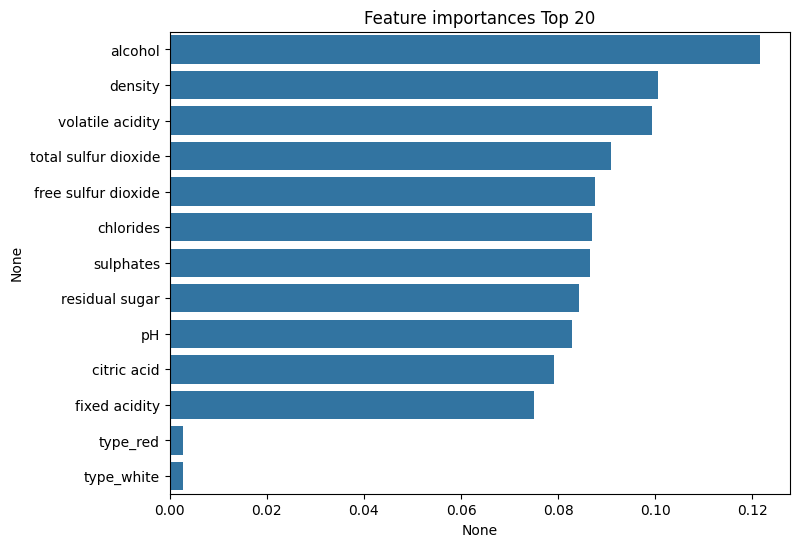

In [ ]:
# 피처 중요도 확인/시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf_1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
# 교차 검증 수행

from sklearn.model_selection import KFold  # K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)

cv_result = cross_val_score(rf_clf_1, train_X, train_Y, cv = kfold, scoring='accuracy')
cv_result.mean()   # 랜덤 포레스트 평균 정확도

0.6843821824805432

# 개별 모델의 정확도

- XGBoost 정확도 : 0.6494
- LightGBM 정확도 : 0.6380
- RandomForest 정확도 : 0.6844

# Voting Classifier

점수 : 0.703

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# Soft Voting Classifier 생성
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('rf', rf_clf_1)
], voting='soft')

# 모델 학습
voting_clf.fit(train_X, train_Y)

# 테스트 데이터 예측 (확률이 아닌 클래스 예측)
voting_pred = voting_clf.predict(test)

# 교차 검증 (Soft Voting Classifier)
cv_result_voting = cross_val_score(voting_clf, train_X, train_Y, cv=KFold(n_splits=10, random_state=22, shuffle=True), scoring='accuracy')
print("Voting Classifier (Soft Voting) 교차 검증 평균 정확도:", cv_result_voting.mean())


Voting Classifier (Soft Voting) 교차 검증 평균 정확도: 0.6849256499420434


In [ ]:
# 제출 파일 생성 (test 데이터에 대한 예측)
le = LabelEncoder()
le.fit(train['quality'])

submission['quality'] = le.inverse_transform(voting_pred)
submission.to_csv('VotingClassifier.csv', index=False)

In [ ]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


# Stacking

점수 : 0.703

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size = 0.2)

In [ ]:
# 교재 코드 참고

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)

  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))

  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf. split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [ ]:
xgb_train, xgb_test = get_stacking_base_datasets(xgb, X_train.values, y_train, X_test.values, 7)
lgb_train, lgb_test = get_stacking_base_datasets(lgb, X_train.values, y_train, X_test.values, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf_1, X_train.values, y_train, X_test.values, 7)
vc_train, vc_test = get_stacking_base_datasets(voting_clf, X_train.values, y_train, X_test.values, 7)

XGBClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
LGBMClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
VotingClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [ ]:
Stack_final_X_train = np.concatenate((xgb_train, lgb_train, rf_train, vc_train), axis=1)
Stack_final_X_test = np.concatenate((xgb_test, lgb_test, rf_test, vc_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 13) 원본 테스트 피처 Shape: (1100, 13)
스태킹 학습 피처 데이터 Shape: (4397, 4) 스태킹 테스트 피처 데이터 Shape: (1100, 4)


In [ ]:
final = RandomForestClassifier() # RandomForestClassifier를 사용할 때 예측 정확도가 가장 높

final.fit(Stack_final_X_train, y_train)
stack_final = final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.6836


In [ ]:
final.fit(train_X, train_Y)

RandomForestClassifier()

In [ ]:
# 제출 파일 생성 (test 데이터에 대한 예측)
le = LabelEncoder()
le.fit(train['quality'])

submission['quality'] = le.inverse_transform(voting_pred)
submission.to_csv('Stacking.csv', index=False)

In [ ]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6
